# 06 - Python Finance

**Capitulo 06**: simulação de Monte Carlo do desempenho de carteiras aleatórias de ações com base nos ativos que compõem o índice Bovespa.

Uma carteira aleatória de ações pode ter desempenho melhor do que as de analistas profissionais?

## 1. Importando bibliotecas

Instalando o YFinance


In [ ]:
# Configurando Yahoo Finance
!pip install yfinance --upgrade --no-cache-dir

Importando o YFinance e sobrescrevendo os métodos do pandas_datareader

In [1]:
import yfinance as yf
#yf.pdr_override()

Importando as Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random

## 2. Obtendo e tratando os dados

Baixar preço de fechamento de todos ativos que compõe o índice Bovespa.

In [3]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]

ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  73 of 73 completed

3 Failed downloads:
- TIMP3.SA: No data found, symbol may be delisted
- VIVT4.SA: No data found, symbol may be delisted
- PCAR4.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


Exibindo dados

In [4]:
dados_yahoo

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PCAR4.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-26,12.411126,20.520000,37.264317,29.130148,17.695467,19.754131,25.319273,36.726402,27.247013,16.997618,15.970000,19.230000,11.49,55.920933,13.304831,4.920479,9.143451,5.85,21.322289,60.178478,7.085202,11.648585,16.849228,11.30,38.742607,18.267984,21.585415,10.13,15.687284,17.633520,20.311831,10.745815,53.110001,4.707653,13.040000,10.034267,15.982861,30.819012,36.383591,8.770285,8.744174,23.755424,21.375736,14.130000,20.627562,37.990513,10.034895,8.400000,13.824432,23.363464,28.997738,NaN,14.057306,14.388933,25.620243,21.942911,21.030001,34.514786,29.198839,38.701332,10.880281,35.649185,28.049999,23.372078,NaN,17.574648,13.984606,5.092583,38.576557,NaN,5.70,37.640205,31.741653
2020-03-27,12.110544,19.500000,35.595905,26.980499,16.668617,18.470245,23.364302,35.907631,26.067366,15.431546,14.870000,17.719999,10.90,51.107204,12.255463,4.536682,8.430261,5.32,20.976788,54.479832,6.755890,12.081408,14.852830,10.57,36.713905,18.036961,21.158995,8.97,15.102665,16.123465,19.145603,9.929802,47.740002,4.502121,12.590000,9.060513,15.242641,30.220959,34.524651,9.185393,8.276779,22.501528,20.417883,14.980000,18.797298,35.349148,9.517533,8.520000,13.203110,20.910349,28.547773,NaN,12.545664,13.299014,23.320864,21.314859,19.150000,31.161810,26.353476,38.759373,10.739652,33.644260,32.869999,22.895649,NaN,15.046041,12.802119,4.844889,36.831425,NaN,5.70,35.071350,27.481951
2020-03-30,12.168721,19.090000,35.682705,27.697048,17.040403,19.045780,23.640858,35.591961,27.400463,15.040027,14.510000,17.700001,10.80,50.818184,11.831865,4.684296,8.329683,5.06,21.302546,54.421085,7.045286,12.184909,14.510854,10.20,37.380745,19.945045,22.549126,9.32,15.872415,17.136663,20.068865,9.615193,48.000000,4.404249,12.300000,8.966919,14.853054,29.893724,34.912342,9.485685,8.588376,23.618282,21.082516,15.730000,18.836872,35.044746,10.152035,8.950000,12.659453,20.557102,27.427860,NaN,12.940423,13.379008,23.865974,20.753944,19.799999,28.555044,27.292252,39.475170,10.103117,33.410614,33.990002,22.715862,NaN,15.515403,12.313489,4.735904,38.365303,NaN,5.45,33.742290,26.274708
2020-03-31,11.557861,17.549999,34.621868,26.646109,16.650911,18.390556,23.698076,33.184959,27.966312,14.810846,15.090000,17.219999,9.98,47.838257,11.292740,4.369386,8.146813,4.00,20.364759,52.639030,6.965453,10.444208,13.059769,9.45,36.554237,20.415649,22.199461,9.54,15.862669,17.146404,19.670404,9.880643,44.959999,4.551058,11.370000,8.443202,14.492684,27.839140,31.065226,8.549481,8.539689,22.619083,19.880314,16.219999,17.807966,32.953262,9.515093,8.850000,11.882799,18.722172,25.737991,NaN,13.614405,13.988963,23.390242,20.258667,19.650000,26.167164,26.130882,37.830772,9.140917,31.588221,35.790001,23.120378,NaN,15.429463,12.245080,4.874613,39.697113,NaN,5.28,33.295963,21.759815
2020-04-01,11.334848,14.850000,33.416370,25.518736,15.925035,17.584808,22.944698,29.594200,28.062218,13.388012,15.610000,16.270000,9.46,47.917988,11.196468,4.211930,7.707929,3.87,19.466459,48.859520,6.825744,8.844644,11.978387,9.06,35.878006,18.961054,21.269863,9.44,15.285054,15.987075,19.437159,9.408731,41.419998,4.365100,9.980000,7.981215,13.177824,26.495382,29.733149,8.222693,8.043082,20.977177,21.277996,15.750000,17.758501,31.666941,9.146593,9.200000,10.678987,18.182487,23.188190,NaN,13.68180

In [5]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)
#246 Dias de pregão, 73 colunas

In [6]:
dados_yahoo

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-26,12.411126,20.520000,37.264317,29.130148,17.695467,19.754131,25.319273,36.726402,27.247013,16.997618,15.970000,19.230000,11.49,55.920933,13.304831,4.920479,9.143451,5.85,21.322289,60.178478,7.085202,11.648585,16.849228,11.30,38.742607,18.267984,21.585415,10.13,15.687284,17.633520,20.311831,10.745815,53.110001,4.707653,13.040000,10.034267,15.982861,30.819012,36.383591,8.770285,8.744174,23.755424,21.375736,14.130000,20.627562,37.990513,10.034895,8.400000,13.824432,23.363464,28.997738,14.057306,14.388933,25.620243,21.942911,21.030001,34.514786,29.198839,38.701332,10.880281,35.649185,28.049999,23.372078,17.574648,13.984606,5.092583,38.576557,5.70,37.640205,31.741653
2020-03-27,12.110544,19.500000,35.595905,26.980499,16.668617,18.470245,23.364302,35.907631,26.067366,15.431546,14.870000,17.719999,10.90,51.107204,12.255463,4.536682,8.430261,5.32,20.976788,54.479832,6.755890,12.081408,14.852830,10.57,36.713905,18.036961,21.158995,8.97,15.102665,16.123465,19.145603,9.929802,47.740002,4.502121,12.590000,9.060513,15.242641,30.220959,34.524651,9.185393,8.276779,22.501528,20.417883,14.980000,18.797298,35.349148,9.517533,8.520000,13.203110,20.910349,28.547773,12.545664,13.299014,23.320864,21.314859,19.150000,31.161810,26.353476,38.759373,10.739652,33.644260,32.869999,22.895649,15.046041,12.802119,4.844889,36.831425,5.70,35.071350,27.481951
2020-03-30,12.168721,19.090000,35.682705,27.697048,17.040403,19.045780,23.640858,35.591961,27.400463,15.040027,14.510000,17.700001,10.80,50.818184,11.831865,4.684296,8.329683,5.06,21.302546,54.421085,7.045286,12.184909,14.510854,10.20,37.380745,19.945045,22.549126,9.32,15.872415,17.136663,20.068865,9.615193,48.000000,4.404249,12.300000,8.966919,14.853054,29.893724,34.912342,9.485685,8.588376,23.618282,21.082516,15.730000,18.836872,35.044746,10.152035,8.950000,12.659453,20.557102,27.427860,12.940423,13.379008,23.865974,20.753944,19.799999,28.555044,27.292252,39.475170,10.103117,33.410614,33.990002,22.715862,15.515403,12.313489,4.735904,38.365303,5.45,33.742290,26.274708
2020-03-31,11.557861,17.549999,34.621868,26.646109,16.650911,18.390556,23.698076,33.184959,27.966312,14.810846,15.090000,17.219999,9.98,47.838257,11.292740,4.369386,8.146813,4.00,20.364759,52.639030,6.965453,10.444208,13.059769,9.45,36.554237,20.415649,22.199461,9.54,15.862669,17.146404,19.670404,9.880643,44.959999,4.551058,11.370000,8.443202,14.492684,27.839140,31.065226,8.549481,8.539689,22.619083,19.880314,16.219999,17.807966,32.953262,9.515093,8.850000,11.882799,18.722172,25.737991,13.614405,13.988963,23.390242,20.258667,19.650000,26.167164,26.130882,37.830772,9.140917,31.588221,35.790001,23.120378,15.429463,12.245080,4.874613,39.697113,5.28,33.295963,21.759815
2020-04-01,11.334848,14.850000,33.416370,25.518736,15.925035,17.584808,22.944698,29.594200,28.062218,13.388012,15.610000,16.270000,9.46,47.917988,11.196468,4.211930,7.707929,3.87,19.466459,48.859520,6.825744,8.844644,11.978387,9.06,35.878006,18.961054,21.269863,9.44,15.285054,15.987075,19.437159,9.408731,41.419998,4.365100,9.980000,7.981215,13.177824,26.495382,29.733149,8.222693,8.043082,20.977177,21.277996,15.750000,17.758501,31.666941,9.146593,9.200000,10.678987,18.182487,23.188190,13.681803,14.298941,22.190994,20.566969,19.559999,23.580297,23.943626,35.441563,9.096506,3

In [7]:
#variação de cada ativo percentual
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-27,-0.024219,-0.049708,-0.044772,-0.073795,-0.058029,-0.064993,-0.077213,-0.022294,-0.043295,-0.092135,-0.068879,-0.078523,-0.051349,-0.086081,-0.078871,-0.078000,-0.078000,-0.090598,-0.016204,-0.094696,-0.046479,0.037157,-0.118486,-0.064602,-0.052364,-0.012646,-0.019755,-0.114511,-0.037267,-0.085636,-0.057416,-0.075938,-0.101111,-0.043659,-0.034509,-0.097043,-0.046313,-0.019405,-0.051093,0.047331,-0.053452,-0.052784,-0.044810,0.060156,-0.088729,-0.069527,-0.051556,0.014286,-0.044944,-0.104998,-0.015517,-0.107534,-0.075747,-0.089749,-0.028622,-0.089396,-0.097146,-0.097448,0.001500,-0.012925,-0.056240,0.171836,-0.020385,-0.143878,-0.084556,-0.048638,-0.045238,0.000000,-0.068248,-0.134199
2020-03-30,0.004804,-0.021026,0.002438,0.026558,0.022305,0.031160,0.011837,-0.008791,0.051140,-0.025371,-0.024210,-0.001129,-0.009174,-0.005655,-0.034564,0.032538,-0.011931,-0.048872,0.015529,-0.001078,0.042836,0.008567,-0.023024,-0.035005,0.018163,0.105787,0.065699,0.039019,0.050968,0.062840,0.048223,-0.031683,0.005446,-0.021739,-0.023034,-0.010330,-0.025559,-0.010828,0.011229,0.032692,0.037647,0.049630,0.032552,0.050067,0.002105,-0.008611,0.066667,0.050469,-0.041176,-0.016893,-0.039229,0.031466,0.006015,0.023374,-0.026316,0.033943,-0.083653,0.035622,0.018468,-0.059270,-0.006945,0.034074,-0.007852,0.031195,-0.038168,-0.022495,0.041646,-0.043860,-0.037896,-0.043929
2020-03-31,-0.050199,-0.080671,-0.029730,-0.037944,-0.022857,-0.034403,0.002420,-0.067628,0.020651,-0.015238,0.039972,-0.027119,-0.075926,-0.058639,-0.045566,-0.067227,-0.021954,-0.209486,-0.044022,-0.032746,-0.011331,-0.142857,-0.100000,-0.073529,-0.022111,0.023595,-0.015507,0.023605,-0.000614,0.000568,-0.019855,0.027607,-0.063333,0.033334,-0.075610,-0.058405,-0.024262,-0.068730,-0.110194,-0.098697,-0.005669,-0.042306,-0.057024,0.031151,-0.054622,-0.059680,-0.062740,-0.011173,-0.061350,-0.089260,-0.061611,0.052083,0.045590,-0.019934,-0.023864,-0.007576,-0.083624,-0.042553,-0.041657,-0.095238,-0.054545,0.052957,0.017808,-0.005539,-0.005556,0.029289,0.034714,-0.031193,-0.013228,-0.171834
2020-04-01,-0.019295,-0.153846,-0.034819,-0.042309,-0.043594,-0.043813,-0.031791,-0.108204,0.003429,-0.096067,0.034460,-0.055168,-0.052104,0.001667,-0.008525,-0.036036,-0.053872,-0.032500,-0.044111,-0.071801,-0.020057,-0.153153,-0.082803,-0.041270,-0.018499,-0.071249,-0.041875,-0.010482,-0.036413,-0.067614,-0.011858,-0.047761,-0.078737,-0.040860,-0.122252,-0.054717,-0.090726,-0.048269,-0.042880,-0.038223,-0.058153,-0.072589,0.070305,-0.028977,-0.002778,-0.039035,-0.038728,0.039548,-0.101307,-0.028826,-0.099068,0.004950,0.022159,-0.051271,0.015218,-0.004580,-0.098859,-0.083704,-0.063155,-0.004858,0.015976,0.044426,-0.012053,-0.040917,-0.085395,-0.046748,0.003471,-0.119318,-0.033959,-0.021200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [8]:
#retorno acumulado, informação normalizada desde o primeiro dia 
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-27,0.975781,0.950292,0.955228,0.926205,0.941971,0.935007,0.922787,0.977706,0.956705,0.907865,0.931121,0.921477,0.948651,0.913919,0.921129,0.922000,0.922000,0.909402,0.983796,0.905304,0.953521,1.037157,0.881514,0.935398,0.947636,0.987354,0.980245,0.885489,0.962733,0.914364,0.942584,0.924062,0.898889,0.956341,0.965491,0.902957,0.953687,0.980595,0.948907,1.047331,0.946548,0.947216,0.955190,1.060156,0.911271,0.930473,0.948444,1.014286,0.955056,0.895002,0.984483,0.892466,0.924253,0.910251,0.971378,0.910604,0.902854,0.902552,1.001500,0.987075,0.943760,1.171836,0.979615,0.856122,0.915444,0.951362,0.954762,1.000000,0.931752,0.865801
2020-03-30,0.980469,0.930312,0.957557,0.950804,0.962981,0.964142,0.933710,0.969111,1.005632,0.884831,0.908579,0.920437,0.939948,0.908751,0.889291,0.952000,0.911000,0.864957,0.999074,0.904328,0.994366,1.046042,0.861218,0.902655,0.964848,1.091803,1.044646,0.920039,1.011801,0.971823,0.988038,0.894785,0.903785,0.935551,0.943252,0.893630,0.929311,0.969977,0.959563,1.081571,0.982183,0.994227,0.986283,1.113234,0.913189,0.922460,1.011673,1.065476,0.915730,0.879882,0.945862,0.920548,0.929812,0.931528,0.945815,0.941512,0.827328,0.934703,1.019995,0.928571,0.937206,1.211765,0.971923,0.882829,0.880503,0.929961,0.994524,0.956140,0.896443,0.827767
2020-03-31,0.931250,0.855263,0.929089,0.914726,0.940970,0.930973,0.935970,0.903572,1.026399,0.871348,0.944897,0.895476,0.868581,0.855462,0.848770,0.888000,0.891000,0.683761,0.955093,0.874715,0.983099,0.896607,0.775096,0.836283,0.943515,1.117564,1.028447,0.941757,1.011180,0.972376,0.968421,0.919488,0.846545,0.966736,0.871933,0.841437,0.906764,0.903311,0.853825,0.974824,0.976615,0.952165,0.930041,1.147912,0.863309,0.867408,0.948201,1.053572,0.859551,0.801344,0.887586,0.968493,0.972203,0.912959,0.923244,0.934379,0.758144,0.894929,0.977506,0.840136,0.886085,1.275936,0.989231,0.877939,0.875611,0.957198,1.029048,0.926316,0.884585,0.685529
2020-04-01,0.913281,0.723684,0.896739,0.876025,0.899950,0.890184,0.906215,0.805802,1.029919,0.787640,0.977458,0.846074,0.823325,0.856888,0.841534,0.856000,0.843000,0.661538,0.912963,0.811910,0.963380,0.759289,0.710916,0.801770,0.926061,1.037939,0.985381,0.931885,0.974360,0.906630,0.956938,0.875572,0.779891,0.927235,0.765337,0.795396,0.824497,0.859709,0.817213,0.937563,0.919822,0.883048,0.995428,1.114650,0.860911,0.833549,0.911479,1.095238,0.772472,0.778244,0.799655,0.973288,0.993746,0.866151,0.937294,0.930100,0.683194,0.820020,0.915771,0.836054,0.900242,1.332620,0.977308,0.842016,0.800839,0.912451,1.032619,0.815790,0.854545,0.670996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## 3. Resultados

In [9]:
carteira = random.sample(list(dados_yahoo.columns) , k=5)
carteira = 1000 * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

,NTCO3.SA,VVAR3.SA,GNDI3.SA,MRFG3.SA,SUZB3.SA,saldo,retorno
Date,,,,,,,
2020-03-26,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000,NaN
2020-03-27,984.482772,1000.000000,898.889119,1014.285815,1171.836001,5069.493707,0.013899
2020-03-30,945.862066,956.140349,903.784588,1065.476216,1211.764799,5083.028018,0.002670
2020-03-31,887.586178,926.315857,846.544880,1053.571522,1275.935896,4989.954333,-0.018311
2020-04-01,799.655151,815.789518,779.890749,1095.238122,1332.620395,4823.193935,-0.033419
...,...,...,...,...,...,...,...
2021-03-22,1754.964459,2119.298303,1579.740173,1946.428705,2581.461876,9981.893517,-0.006582
2021-03-23,1735.307764,2124.561414,1607.606784,2023.809616,2558.645226,10049.930804,0.006816
2021-03-24,1657.715505,2007.017537,1562.794183,2041.666714,2626.025157,9895.219096,-0.015394


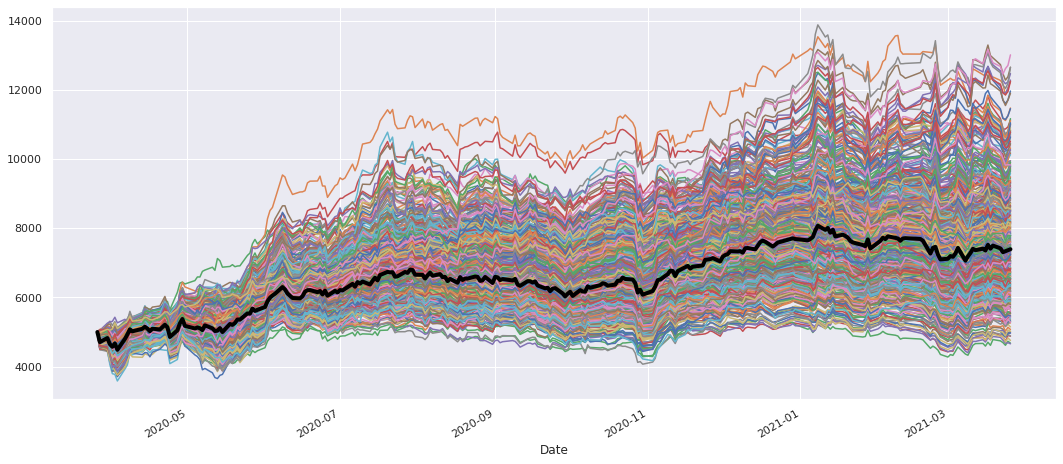

In [12]:
for i in range(500):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 1000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*5000).plot(linewidth=4, color='black')

**ERRATA:** com o uso da função random.choices pode acontecer de selecionar ativos repetidos. Dessa forma o código foi alterado para o uso da função random.sample. Então:
substituir a linha: carteira = random.choices(dados_yahoo.columns, k=5)
por: carteira = random.sample(list(dados_yahoo.columns) , k=5)

## 4. Análise 

In [20]:
tickers_ibov1 = "PETR3.SA PRIO3.SA BBDC4.SA ITUB4.SA BBAS3.SA BIDI4.SA ITSA4.SA VALE3.SA MGLU3.SA MDIA3.SA ALPA4.SA WEGE3.SA TAEE11.SA TRPL4.SA ALUP11.SA EGIE3.SA EQTL3.SA ENGI11.SA SAPR11.SA MRVE3.SA EZTC3.SA TRIS3.SA ABEV3.SA QUAL3.SA FLRY3.SA RADL3.SA HYPE3.SA GNDI3.SA VIVT3.SA RENT3.SA RAIL3.SA JBSS3.SA LWSA3.SA TOTS3.SA SUZB3.SA CSAN3.SA UNIP6.SA NTCO3.SA ^BVSP"

dados_yahoo1 = yf.download(tickers=tickers_ibov1, period='1y')["Adj Close"]

ibov1 = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov1 = ibov1 / ibov1.iloc[0]

[*********************100%***********************]  39 of 39 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
dados_yahoo1

,ABEV3.SA,ALPA4.SA,ALUP11.SA,BBAS3.SA,BBDC4.SA,BIDI4.SA,CSAN3.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,GNDI3.SA,HYPE3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LWSA3.SA,MDIA3.SA,MGLU3.SA,MRVE3.SA,NTCO3.SA,PETR3.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SAPR11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-26,12.411126,26.299999,22.901115,29.130148,19.754131,11.777542,60.178478,38.742607,38.007401,17.633520,37.407707,20.311831,53.110001,30.819012,8.744174,23.755424,21.375736,4.079346,32.756531,10.034895,13.824432,28.997738,14.057306,18.930000,25.620243,21.942911,21.030001,34.514786,23.546793,28.049999,23.372078,17.574648,7.981664,18.267677,21.758665,38.576557,44.745838,37.640205,77710.0
2020-03-27,12.110544,24.490000,21.833691,26.980499,18.470245,11.270232,54.479832,36.713905,35.892647,16.123465,33.502396,19.145603,47.740002,30.220959,8.276779,22.501528,20.417883,4.353798,30.990440,9.517533,13.203110,28.547773,12.545664,18.100000,23.320864,21.314859,19.150000,31.161810,23.585421,32.869999,22.895649,15.046041,7.971930,17.720097,21.628708,36.831425,43.932610,35.071350,73429.0
2020-03-30,12.168721,24.360001,21.833691,27.697048,19.045780,10.752975,54.421085,37.380745,36.785110,17.136663,32.441818,20.068865,48.000000,29.893724,8.588376,23.618282,21.082516,4.578349,30.921375,10.152035,12.659453,27.427860,12.940423,17.000000,23.865974,20.753944,19.799999,28.555044,24.142305,33.990002,22.715862,15.515403,7.864859,17.387957,22.510565,38.365303,44.773247,33.742290,74640.0
2020-03-31,11.557861,23.160000,21.833691,26.646109,18.390556,10.534135,52.639030,36.554237,36.668705,17.146404,29.438496,19.670404,44.959999,27.839140,8.539689,22.619083,19.880314,4.491024,28.711296,9.515093,11.882799,25.737991,13.614405,16.700001,23.390242,20.258667,19.650000,26.167164,23.031759,35.790001,23.120378,15.429463,7.056959,17.028887,22.278498,39.697113,46.235229,33.295963,73020.0
2020-04-01,11.334848,22.490000,20.989454,25.518736,17.584808,10.188382,48.859520,35.878006,34.777061,15.987075,25.662041,19.437159,41.419998,26.495382,8.043082,20.977177,21.277996,3.742520,27.152401,9.146593,10.678987,23.188190,13.681803,16.480000,22.190994,20.566969,19.559999,23.580297,22.152979,37.380001,22.841713,14.798139,6.229591,16.373585,21.814362,39.834885,45.853851,32.165268,70967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,15.080000,36.230000,24.910000,29.680000,26.309999,55.580002,92.180000,41.549999,43.860001,21.570000,31.920000,25.450001,85.379997,32.669998,10.240920,27.599360,27.549999,24.740000,31.000000,21.510000,17.459999,50.320000,22.549999,87.029999,32.540001,25.959999,19.980000,56.549999,21.940001,71.769997,36.130001,28.799999,10.260000,24.820000,64.570000,91.059998,45.570000,71.610001,113262.0
2021-03-24,14.800000,34.669998,24.610001,29.139999,26.040001,53.790001,90.889999,40.310001,41.880001,21.020000,30.780001,24.840000,83.000000,31.700001,10.031310,27.120239,27.520000,24.100000,30.700001,20.370001,16.920000,48.070000,22.530001,88.010002,31.980000,25.059999,19.610001,55.130001,21.850000,73.660004,35.730000,27.840000,9.740000,24.170000,66.050003,93.150002,45.000000,70.519997,112064.0
2021-03-25,14.990000,36.250000,24.990000,29.559999,26.620001,51.470001,92.099998,40.990002,44.380001,22.480000,31.860001,25.110001,87.099998,32.430000,10.240920,27.599360,27.969999,23.500000,30.620001,20.299999,17.500000,49.369999,22.959999,89.410004,32.209999,25.030001,19.799999,56.799999,22.410000,73.199997,35.779999,28.209999,9.920000,24.530001,66.169998,92.440002,45.200001,71.070000,113750.0


In [23]:
dados_yahoo1.dropna(how='all', inplace=True)
dados_yahoo1.dropna(axis=1, inplace=True, thresh=247)

In [24]:
dados_yahoo1

,ABEV3.SA,ALPA4.SA,ALUP11.SA,BBAS3.SA,BBDC4.SA,BIDI4.SA,CSAN3.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,GNDI3.SA,HYPE3.SA,JBSS3.SA,LWSA3.SA,MDIA3.SA,MGLU3.SA,MRVE3.SA,NTCO3.SA,PETR3.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SAPR11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-26,12.411126,26.299999,22.901115,29.130148,19.754131,11.777542,60.178478,38.742607,38.007401,17.633520,37.407707,20.311831,53.110001,30.819012,21.375736,4.079346,32.756531,10.034895,13.824432,28.997738,14.057306,18.930000,25.620243,21.942911,21.030001,34.514786,23.546793,28.049999,23.372078,17.574648,7.981664,18.267677,21.758665,38.576557,44.745838,37.640205,77710.0
2020-03-27,12.110544,24.490000,21.833691,26.980499,18.470245,11.270232,54.479832,36.713905,35.892647,16.123465,33.502396,19.145603,47.740002,30.220959,20.417883,4.353798,30.990440,9.517533,13.203110,28.547773,12.545664,18.100000,23.320864,21.314859,19.150000,31.161810,23.585421,32.869999,22.895649,15.046041,7.971930,17.720097,21.628708,36.831425,43.932610,35.071350,73429.0
2020-03-30,12.168721,24.360001,21.833691,27.697048,19.045780,10.752975,54.421085,37.380745,36.785110,17.136663,32.441818,20.068865,48.000000,29.893724,21.082516,4.578349,30.921375,10.152035,12.659453,27.427860,12.940423,17.000000,23.865974,20.753944,19.799999,28.555044,24.142305,33.990002,22.715862,15.515403,7.864859,17.387957,22.510565,38.365303,44.773247,33.742290,74640.0
2020-03-31,11.557861,23.160000,21.833691,26.646109,18.390556,10.534135,52.639030,36.554237,36.668705,17.146404,29.438496,19.670404,44.959999,27.839140,19.880314,4.491024,28.711296,9.515093,11.882799,25.737991,13.614405,16.700001,23.390242,20.258667,19.650000,26.167164,23.031759,35.790001,23.120378,15.429463,7.056959,17.028887,22.278498,39.697113,46.235229,33.295963,73020.0
2020-04-01,11.334848,22.490000,20.989454,25.518736,17.584808,10.188382,48.859520,35.878006,34.777061,15.987075,25.662041,19.437159,41.419998,26.495382,21.277996,3.742520,27.152401,9.146593,10.678987,23.188190,13.681803,16.480000,22.190994,20.566969,19.559999,23.580297,22.152979,37.380001,22.841713,14.798139,6.229591,16.373585,21.814362,39.834885,45.853851,32.165268,70967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,15.080000,36.230000,24.910000,29.680000,26.309999,55.580002,92.180000,41.549999,43.860001,21.570000,31.920000,25.450001,85.379997,32.669998,27.549999,24.740000,31.000000,21.510000,17.459999,50.320000,22.549999,87.029999,32.540001,25.959999,19.980000,56.549999,21.940001,71.769997,36.130001,28.799999,10.260000,24.820000,64.570000,91.059998,45.570000,71.610001,113262.0
2021-03-24,14.800000,34.669998,24.610001,29.139999,26.040001,53.790001,90.889999,40.310001,41.880001,21.020000,30.780001,24.840000,83.000000,31.700001,27.520000,24.100000,30.700001,20.370001,16.920000,48.070000,22.530001,88.010002,31.980000,25.059999,19.610001,55.130001,21.850000,73.660004,35.730000,27.840000,9.740000,24.170000,66.050003,93.150002,45.000000,70.519997,112064.0
2021-03-25,14.990000,36.250000,24.990000,29.559999,26.620001,51.470001,92.099998,40.990002,44.380001,22.480000,31.860001,25.110001,87.099998,32.430000,27.969999,23.500000,30.620001,20.299999,17.500000,49.369999,22.959999,89.410004,32.209999,25.030001,19.799999,56.799999,22.410000,73.199997,35.779999,28.209999,9.920000,24.530001,66.169998,92.440002,45.200001,71.070000,113750.0


In [25]:
retorno1 = dados_yahoo1.pct_change()
retorno1

,ABEV3.SA,ALPA4.SA,ALUP11.SA,BBAS3.SA,BBDC4.SA,BIDI4.SA,CSAN3.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,GNDI3.SA,HYPE3.SA,JBSS3.SA,LWSA3.SA,MDIA3.SA,MGLU3.SA,MRVE3.SA,NTCO3.SA,PETR3.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SAPR11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-27,-0.024219,-0.068821,-0.046610,-0.073795,-0.064993,-0.043074,-0.094696,-0.052364,-0.055641,-0.085636,-0.104399,-0.057416,-0.101111,-0.019405,-0.044810,0.067278,-0.053916,-0.051556,-0.044944,-0.015517,-0.107534,-0.043846,-0.089749,-0.028622,-0.089396,-0.097146,0.001640,0.171836,-0.020385,-0.143878,-0.001220,-0.029975,-0.005973,-0.045238,-0.018174,-0.068248,-0.055089
2020-03-30,0.004804,-0.005308,0.000000,0.026558,0.031160,-0.045896,-0.001078,0.018163,0.024865,0.062840,-0.031657,0.048223,0.005446,-0.010828,0.032552,0.051576,-0.002229,0.066667,-0.041176,-0.039229,0.031466,-0.060774,0.023374,-0.026316,0.033943,-0.083653,0.023611,0.034074,-0.007852,0.031195,-0.013431,-0.018744,0.040773,0.041646,0.019135,-0.037896,0.016492
2020-03-31,-0.050199,-0.049261,0.000000,-0.037944,-0.034403,-0.020352,-0.032746,-0.022111,-0.003164,0.000568,-0.092576,-0.019855,-0.063333,-0.068730,-0.057024,-0.019074,-0.071474,-0.062740,-0.061350,-0.061611,0.052083,-0.017647,-0.019934,-0.023864,-0.007576,-0.083624,-0.046000,0.052957,0.017808,-0.005539,-0.102723,-0.020650,-0.010309,0.034714,0.032653,-0.013228,-0.021704
2020-04-01,-0.019295,-0.028929,-0.038667,-0.042309,-0.043813,-0.032822,-0.071801,-0.018499,-0.051587,-0.067614,-0.128283,-0.011858,-0.078737,-0.048269,0.070305,-0.166667,-0.054296,-0.038728,-0.101307,-0.099068,0.004950,-0.013174,-0.051271,0.015218,-0.004580,-0.098859,-0.038155,0.044426,-0.012053,-0.040917,-0.117241,-0.038482,-0.020833,0.003471,-0.008249,-0.033959,-0.028116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,-0.029601,0.004993,0.012602,-0.036051,-0.010902,0.081533,-0.001408,-0.001922,-0.006343,-0.011004,-0.013292,0.009120,0.017640,-0.011498,0.004375,-0.002821,-0.020846,-0.018256,-0.028921,-0.011201,-0.022964,-0.038874,-0.013939,-0.004219,-0.020588,-0.022303,0.006422,-0.008839,0.009218,-0.015048,-0.012512,0.002828,-0.004318,-0.023066,-0.005673,0.004348,-0.014933
2021-03-24,-0.018568,-0.043058,-0.012043,-0.018194,-0.010262,-0.032206,-0.013994,-0.029844,-0.045144,-0.025498,-0.035714,-0.023969,-0.027875,-0.029691,-0.001089,-0.025869,-0.009677,-0.052999,-0.030928,-0.044714,-0.000887,0.011261,-0.017210,-0.034669,-0.018518,-0.025110,-0.004102,0.026334,-0.011071,-0.033333,-0.050682,-0.026189,0.022921,0.022952,-0.012508,-0.015221,-0.010577
2021-03-25,0.012838,0.045573,0.015441,0.014413,0.022273,-0.043131,0.013313,0.016869,0.059694,0.069458,0.035088,0.010870,0.049398,0.023028,0.016352,-0.024896,-0.002606,-0.003437,0.034279,0.027044,0.019086,0.015907,0.007192,-0.001197,0.009689,0.030292,0.025629,-0.006245,0.001399,0.013290,0.018481,0.014895,0.001817,-0.007622,0.004444,0.007799,0.015045


In [26]:
retorno_acumulado1 = (1 + retorno1).cumprod()
retorno_acumulado1.iloc[0] = 1
retorno_acumulado1

,ABEV3.SA,ALPA4.SA,ALUP11.SA,BBAS3.SA,BBDC4.SA,BIDI4.SA,CSAN3.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,GNDI3.SA,HYPE3.SA,JBSS3.SA,LWSA3.SA,MDIA3.SA,MGLU3.SA,MRVE3.SA,NTCO3.SA,PETR3.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SAPR11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-27,0.975781,0.931179,0.953390,0.926205,0.935007,0.956926,0.905304,0.947636,0.944359,0.914364,0.895601,0.942584,0.898889,0.980595,0.955190,1.067278,0.946084,0.948444,0.955056,0.984483,0.892466,0.956154,0.910251,0.971378,0.910604,0.902854,1.001640,1.171836,0.979615,0.856122,0.998780,0.970025,0.994027,0.954762,0.981826,0.931752,0.944911
2020-03-30,0.980469,0.926236,0.953390,0.950804,0.964142,0.913007,0.904328,0.964848,0.967841,0.971823,0.867250,0.988038,0.903785,0.969977,0.986283,1.122324,0.943976,1.011673,0.915730,0.945862,0.920548,0.898045,0.931528,0.945815,0.941512,0.827328,1.025291,1.211765,0.971923,0.882829,0.985366,0.951843,1.034556,0.994524,1.000613,0.896443,0.960494
2020-03-31,0.931250,0.880608,0.953390,0.914726,0.930973,0.894426,0.874715,0.943515,0.964778,0.972376,0.786963,0.968421,0.846545,0.903311,0.930041,1.100917,0.876506,0.948201,0.859551,0.887586,0.968493,0.882198,0.912959,0.923244,0.934379,0.758144,0.978127,1.275936,0.989231,0.877939,0.884146,0.932187,1.023891,1.029048,1.033286,0.884585,0.939647
2020-04-01,0.913281,0.855133,0.916525,0.876025,0.890184,0.865069,0.811910,0.926061,0.915008,0.906630,0.686009,0.956938,0.779891,0.859709,0.995428,0.917431,0.828916,0.911479,0.772472,0.799655,0.973288,0.870576,0.866151,0.937294,0.930100,0.683194,0.940807,1.332620,0.977308,0.842016,0.780488,0.896315,1.002560,1.032619,1.024762,0.854545,0.913229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,1.215039,1.377567,1.087720,1.018876,1.331873,4.719151,1.531777,1.072463,1.153986,1.223238,0.853300,1.252964,1.607607,1.060060,1.288844,6.064697,0.946376,2.143520,1.262981,1.735308,1.604148,4.597464,1.270089,1.183070,0.950071,1.638428,0.931762,2.558645,1.545862,1.638724,1.285446,1.358684,2.967553,2.360501,1.018419,1.902487,1.457496
2021-03-24,1.192478,1.318251,1.074620,1.000338,1.318205,4.567167,1.510341,1.040457,1.101891,1.192048,0.822825,1.222933,1.562794,1.028586,1.287441,5.907810,0.937218,2.029917,1.223920,1.657716,1.602725,4.649234,1.248232,1.142054,0.932477,1.597286,0.927940,2.626025,1.528747,1.584100,1.220297,1.323102,3.035572,2.414679,1.005680,1.873528,1.442080
2021-03-25,1.207787,1.378327,1.091213,1.014756,1.347566,4.370182,1.530447,1.058008,1.167667,1.274845,0.851696,1.236225,1.639992,1.052273,1.308493,5.760727,0.934775,2.022941,1.265875,1.702547,1.633314,4.723191,1.257209,1.140687,0.941512,1.645671,0.951722,2.609626,1.530887,1.605153,1.242849,1.342809,3.041087,2.396274,1.010150,1.888141,1.463776


In [27]:
carteira1 = random.sample(list(dados_yahoo1.columns) , k=12)
carteira1 = 1000 * retorno_acumulado1.loc[: , carteira1]
carteira1['saldo'] = carteira1.sum(axis=1)
carteira1["retorno"] = carteira1['saldo'].pct_change()
carteira1

,TRPL4.SA,SUZB3.SA,CSAN3.SA,ABEV3.SA,ALPA4.SA,BBAS3.SA,VALE3.SA,ALUP11.SA,RADL3.SA,EGIE3.SA,VIVT3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,,,,,,,,
2020-03-26,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,12000.000000,NaN
2020-03-27,970.024612,1171.836001,905.304243,975.781252,931.178726,926.205364,954.761840,953.389835,971.377920,947.636415,981.825603,931.752357,11621.074169,-0.031577
2020-03-30,951.842773,1211.764799,904.328041,980.468739,926.235792,950.803554,994.523769,953.389835,945.815451,964.848463,1000.612540,896.442784,11681.076539,0.005163
2020-03-31,932.186753,1275.935896,874.715214,931.250009,880.608385,914.726169,1029.047586,953.389835,923.244270,943.515166,1033.285583,884.585059,11576.489925,-0.008954
2020-04-01,896.314538,1332.620395,811.910194,913.281219,855.133096,876.024933,1032.618968,916.525413,937.294454,926.060703,1024.762373,854.545495,11377.091781,-0.017224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,1358.683935,2558.645226,1531.776858,1215.038809,1377.566562,1018.875715,2360.500891,1087.719938,1183.069963,1072.462654,1018.418730,1902.486979,17685.246262,-0.007649
2021-03-24,1323.101983,2626.025157,1510.340608,1192.478428,1318.250919,1000.338188,2414.678976,1074.620173,1142.054457,1040.456603,1005.680122,1873.528476,17521.554090,-0.009256
2021-03-25,1342.808956,2609.625631,1530.447448,1207.787239,1378.327036,1014.756243,2396.274039,1091.213215,1140.687328,1058.008346,1010.149829,1888.140593,17668.225902,0.008371


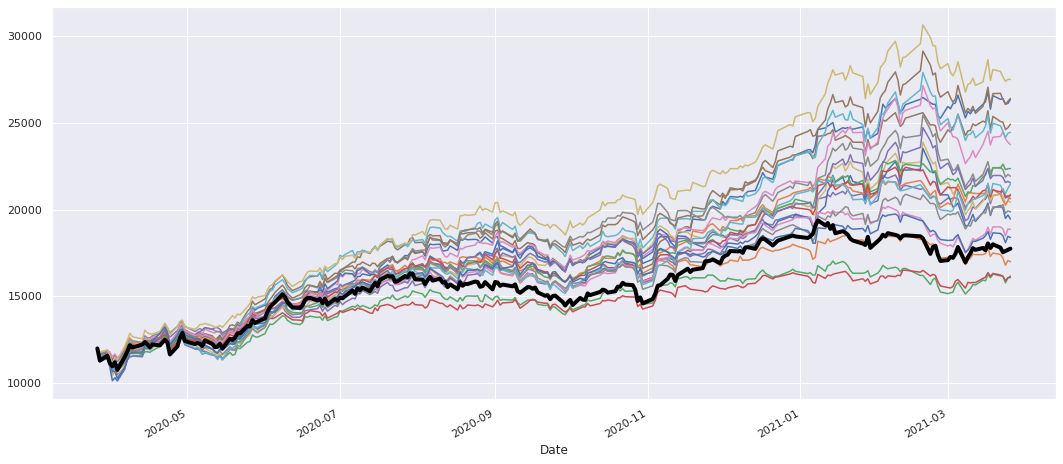

In [35]:
for i in range(21):
  carteira1 = random.sample(list(dados_yahoo1.columns) , k=12)
  carteira1 = 1000 * retorno_acumulado1.loc[: , carteira1]
  carteira1['saldo'] = carteira1.sum(axis=1)
  carteira1['saldo'].plot(figsize=(18,8))

(ibov1*12000).plot(linewidth=4, color='black')